In [1]:
import tensorflow as tf
import tensorflow.compat.v1 as tfc
import math
import numpy as np

In [2]:
tf.__version__

'2.0.0'

In [3]:
def sigmoid(x):
    return 1/(1+math.exp(-x))

In [4]:
#입력
x = np.array([[1,1],[1,0],[0,1],[0,0]])

# AND게이트의 정답
y = np.array([[1],[0],[0],[0]])

# weight는 정규분포 랜덤값으로 2개
w = tf.random.normal([2],0,1)

# bias는 정규분포 랜덤값으로 1개
b = tf.random.normal([1],0,1)


print(w,b)

tf.Tensor([-2.3277073 -0.6070664], shape=(2,), dtype=float32) tf.Tensor([-0.25288934], shape=(1,), dtype=float32)


In [5]:
for i in range(2001):
    error_sum =0
    
    #4가지 입력에 대해서 순회
    for j in range(4):
        output = sigmoid(np.dot(x[j],w)+b)
        # 간단한 손실함수
        error = y[j][0] - output
        # 간단한 경사하강
        w= w+x[j]*0.1*error
        b = b + 0.1*error
        error_sum += error
    if i % 200 == 0:
        print(i,error_sum)

0 0.08880316565394292
200 -0.11795868586973313
400 -0.06831715729591374
600 -0.04799696451130586
800 -0.036883174422150285
1000 -0.02989145087982281
1200 -0.025098096737264652
1400 -0.021611571754633213
1600 -0.018966590414991404
1800 -0.01689023972634635
2000 -0.015219869359490691


In [6]:
for i in range(4):
    print("X:",x[i],"Y:",y[i],"OUTPUTs",sigmoid(np.dot(x[i],w)+b))

X: [1 1] Y: [1] OUTPUTs 0.9644676315009699
X: [1 0] Y: [0] OUTPUTs 0.025177168096383783
X: [0 1] Y: [0] OUTPUTs 0.0252551347910547
X: [0 0] Y: [0] OUTPUTs 2.4652769523982032e-05


In [7]:
# 2층망 모델
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2,activation="sigmoid",input_shape=(2,)),
    tf.keras.layers.Dense(units=1,activation="sigmoid")
])

In [8]:
# SGD 경사하강법,, 손실함수는 mse = 오차제곱평균
model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.1),loss="mse")

# 첫 layer는 인풋이 2개 이므로 각 node마다 weight 2개 bias 1개  총 6개
# 둘째 layer는 노드 한개 인풋은 2,(전 노드의 유닛수) 이므로 weight 2개 bias 1개  총 3개
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [9]:
y = np.array([[0],[1],[1],[0]])

In [10]:
history = model.fit(x,y,epochs=4000,batch_size=1,verbose=0)

In [11]:
model.predict(x)

array([[0.07142587],
       [0.93461794],
       [0.934977  ],
       [0.06893765]], dtype=float32)

In [12]:
for weight in model.weights:
    print(weight)

<tf.Variable 'dense/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[3.5387537, 5.689587 ],
       [3.5561113, 5.7859826]], dtype=float32)>
<tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([-5.416084 , -2.3332376], dtype=float32)>
<tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-7.6951942],
       [ 7.119317 ]], dtype=float32)>
<tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([-3.1984737], dtype=float32)>


In [13]:
import matplotlib.pyplot as plt

In [27]:
x = range(20)
y = tf.random.normal([20],0,1)

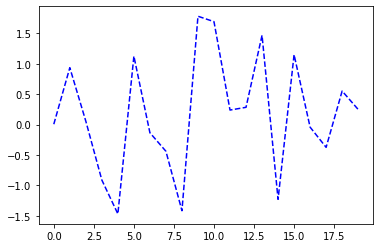

In [28]:
plt.plot(x,y,'b--')
plt.show()

In [29]:
rnadom_normal = tf.random.normal([100000],0,1)

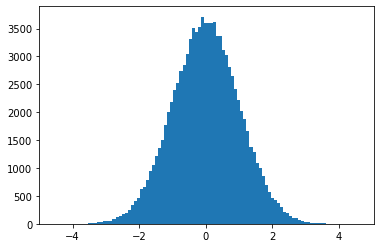

In [32]:
# 히스토 그램 범위 안에 개수를 나타낸다...
# bins에 따라 나누는 영역 범위가 결정됨,,, 저 네모난 박스 크기... 크게 할 수록 더 큰 범위 네모..
plt.hist(rnadom_normal,bins=100)
plt.show()

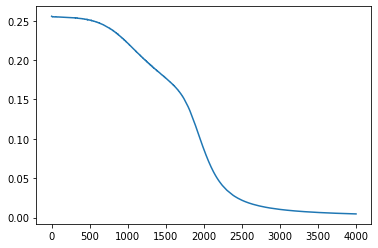

In [34]:
plt.plot(history.history['loss'])
plt.show()